# Rainfall Weather Forecasting
`Project Description`

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain dataset is to predict whether or not it will rain tomorrow. The dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
- Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
- Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


dataset Description:
Number of columns: 23


Date - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

dataset Link-  
https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv


In [276]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [277]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [278]:
df.isna().sum()/len(df)*100

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [279]:
df.duplicated().sum()

1663

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

## Intial Observation
- There are missing values in the dfset
- There are some duplicate values in the dfset
- 7 categorical columns

In [281]:
#Removing duplicates
df.drop_duplicates(inplace=True)

In [282]:
# Handling missing values
for col in df.columns:
    if df[col].dtype=='float64':
        df[col]=df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
            

In [283]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [284]:
# Extracting the Day and Month from Date column.

df['Day']= df['Date'].str.split('-').str[2].astype(int)
df['Month']= df['Date'].str.split('-').str[1].astype(int)
df['Year'] = df['Date'].str.split('-').str[0].astype(int)


In [285]:
df.drop('Date', axis = 1, inplace = True)

<Axes: >

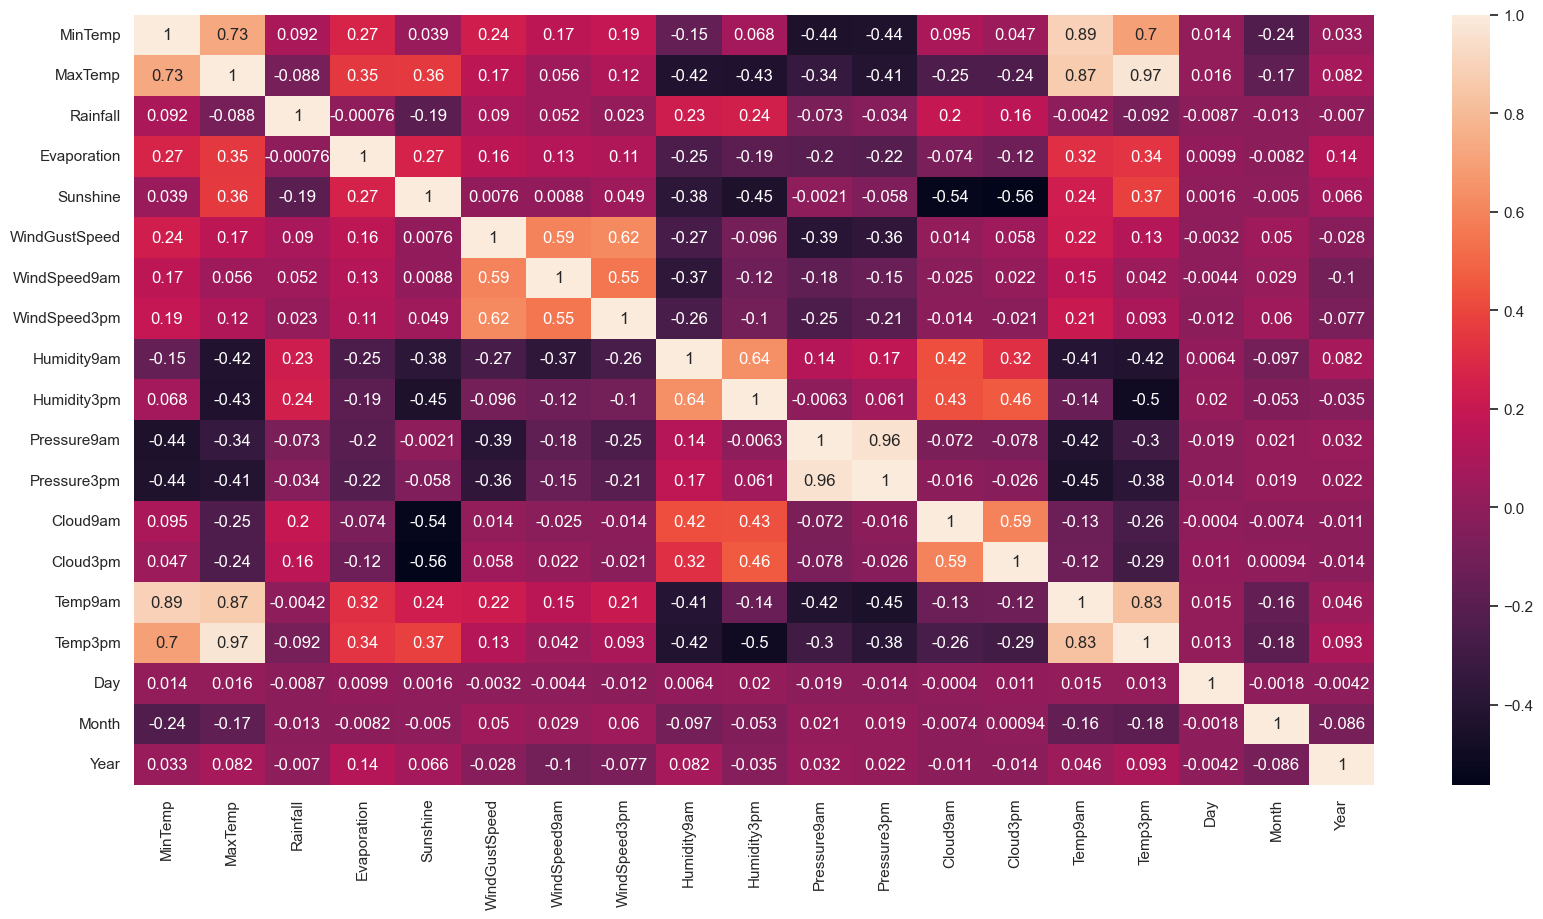

In [286]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(numeric_only=True), annot = True)

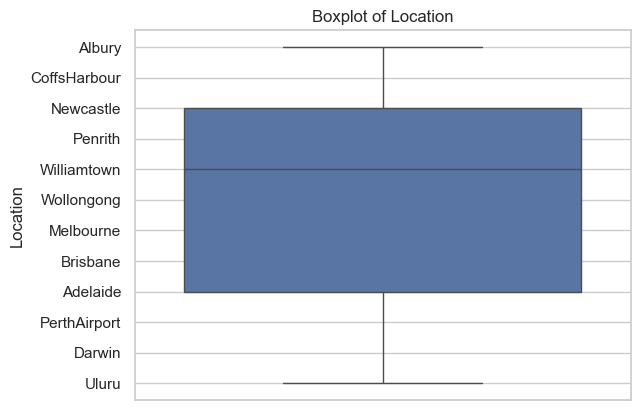

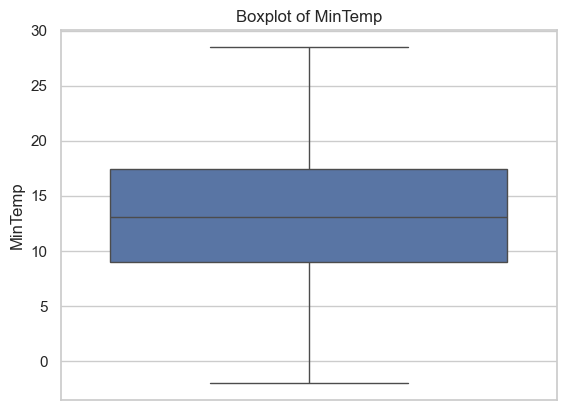

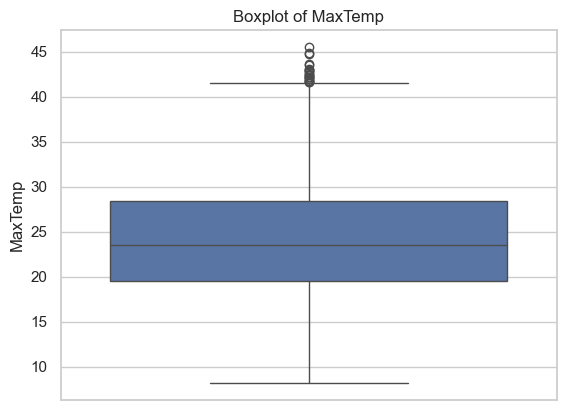

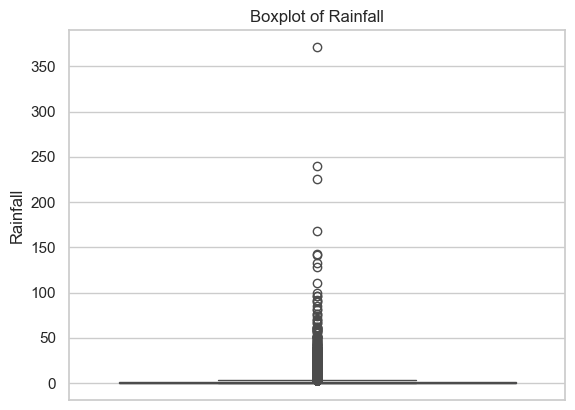

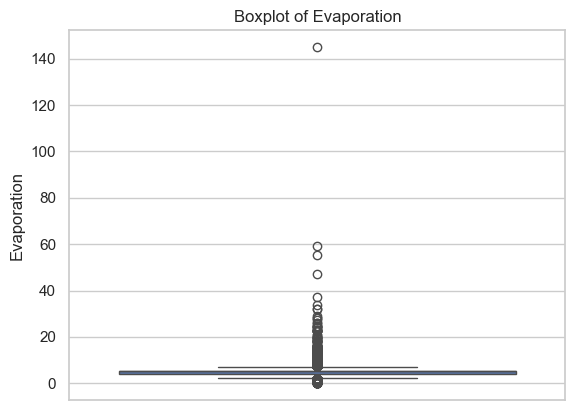

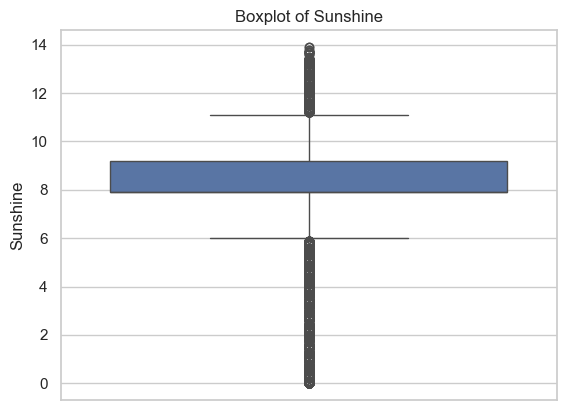

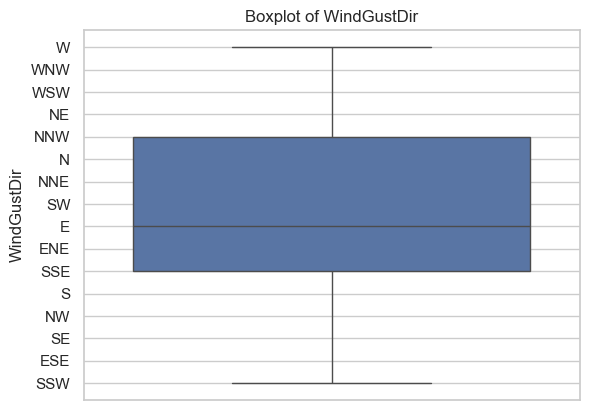

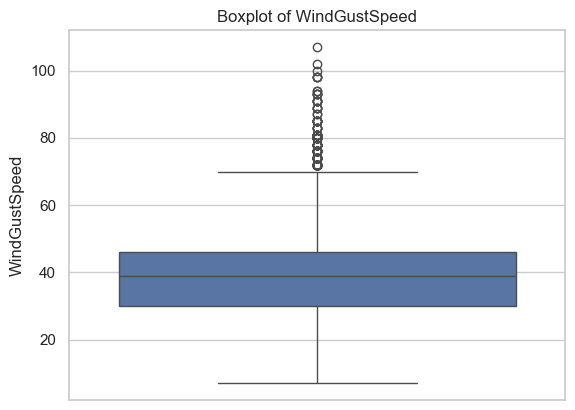

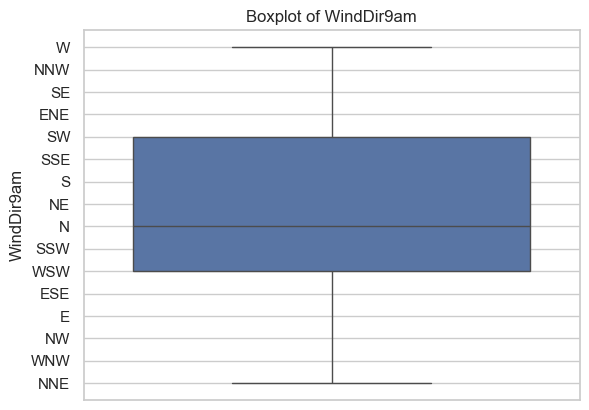

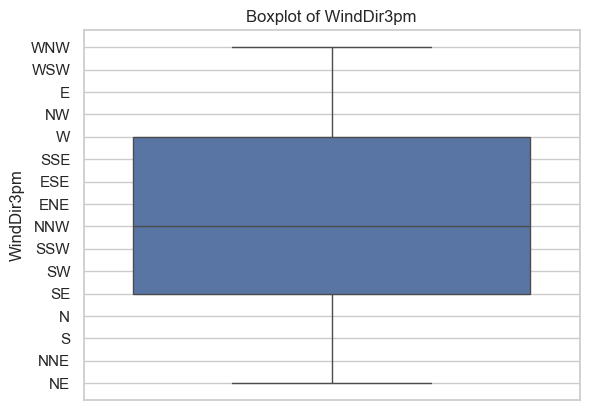

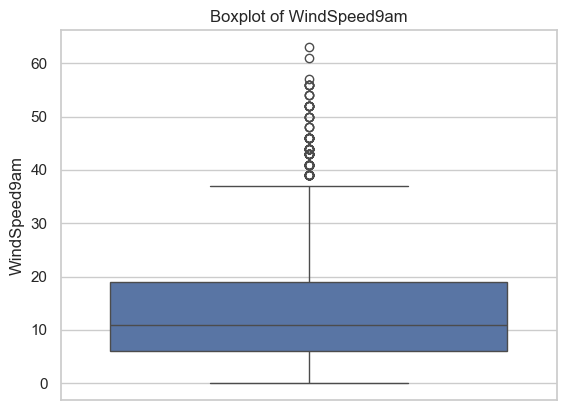

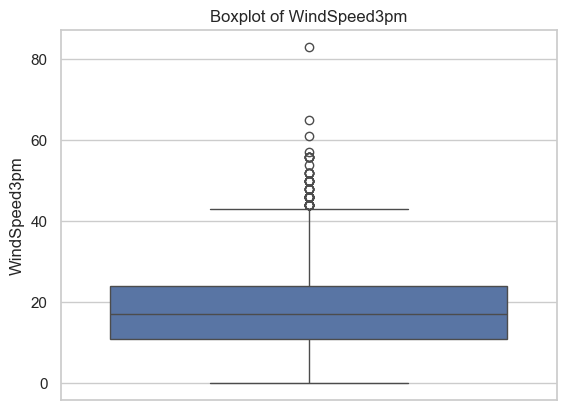

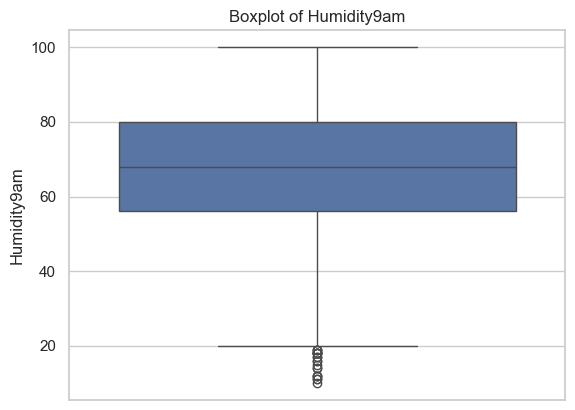

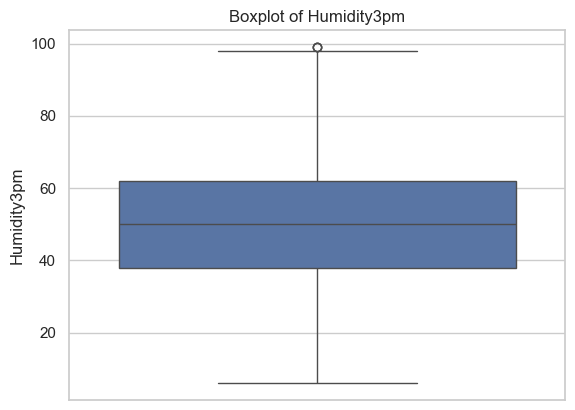

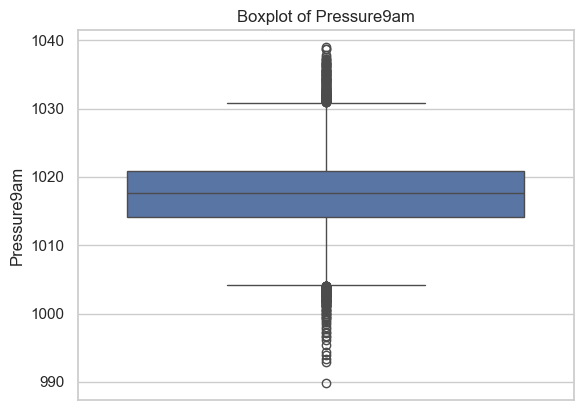

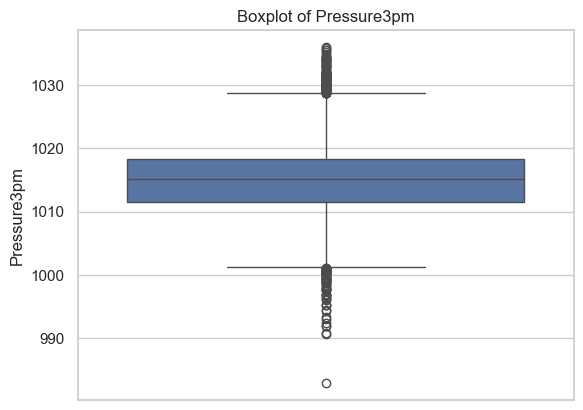

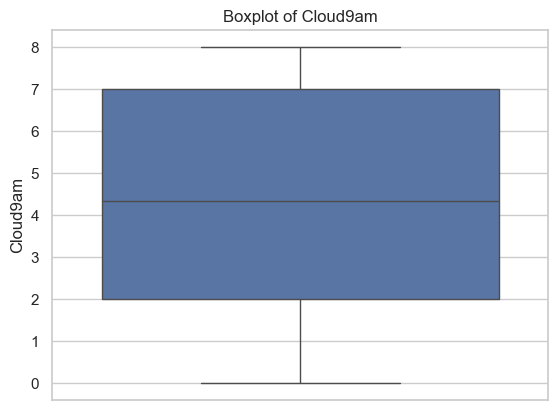

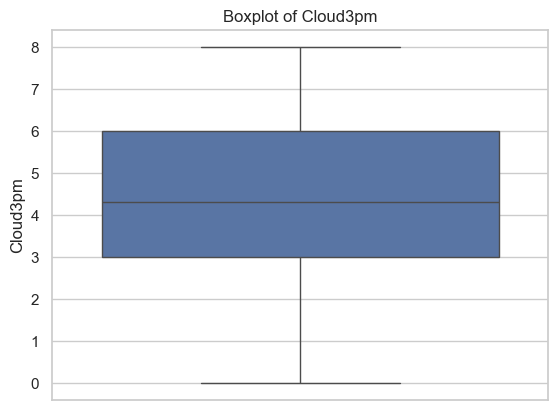

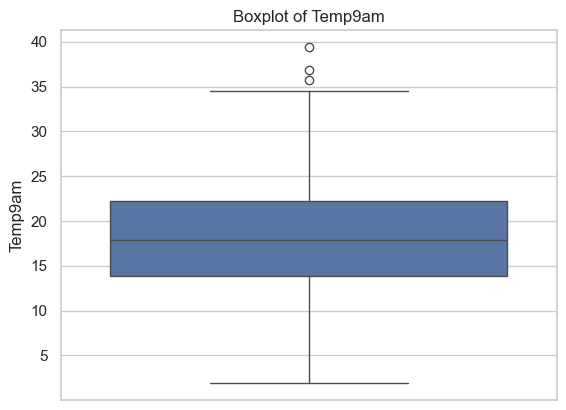

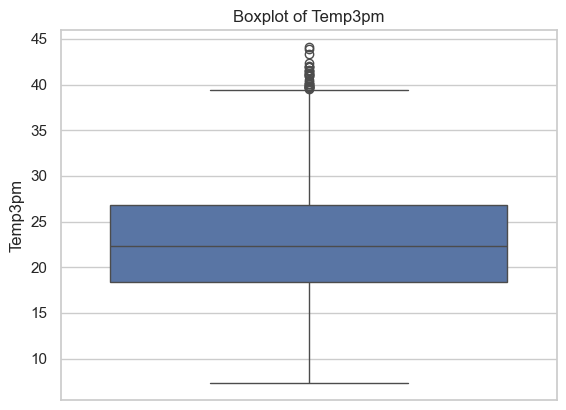

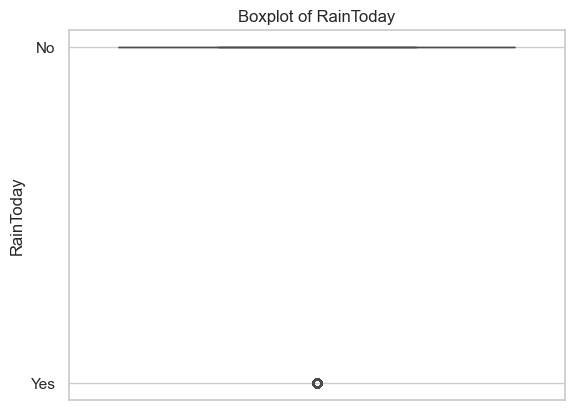

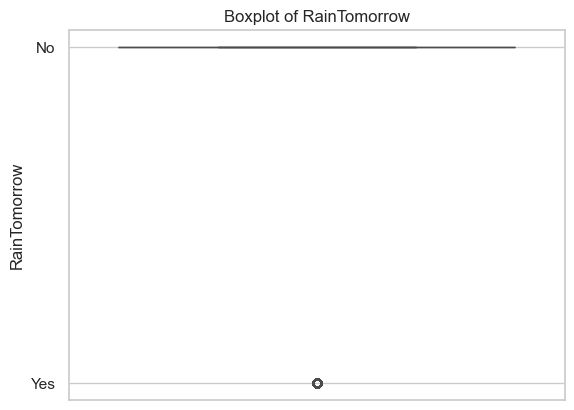

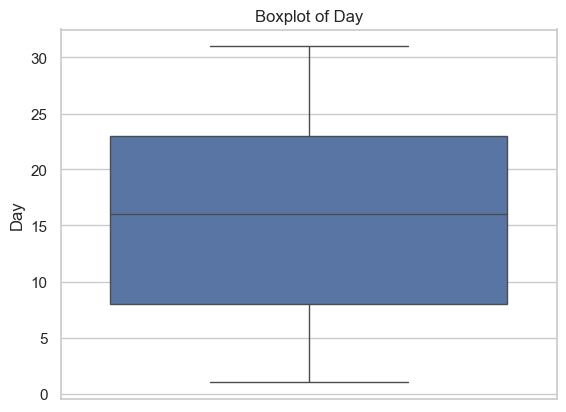

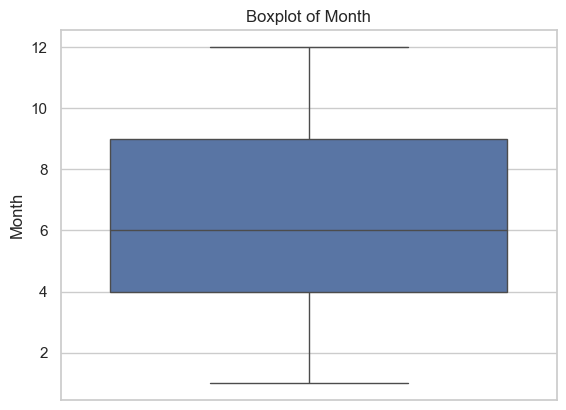

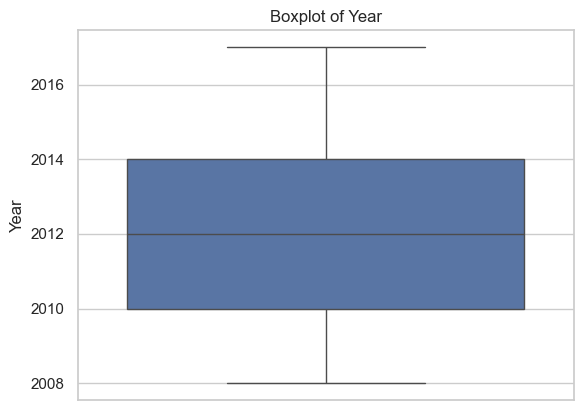

In [287]:
for column in df.columns:
    sns.boxplot(data=df[column]) 
    plt.title(f"Boxplot of {column}")
    plt.show()

In [288]:
# encoding categorical df
from sklearn.preprocessing import LabelEncoder

object_cols = df.select_dtypes(include=['object']).columns.tolist()
object_cols.remove('RainTomorrow')

# one-hot encoding
df = pd.get_dummies(df, columns=object_cols,drop_first=True)

df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,13.4,22.900000,0.6,5.302395,7.890896,44.000000,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,True,False,False
1,7.4,25.100000,0.0,5.302395,7.890896,44.000000,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,True,False
2,12.9,25.700000,0.0,5.302395,7.890896,46.000000,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,True,False
3,9.2,28.000000,0.0,5.302395,7.890896,24.000000,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.300000,1.0,5.302395,7.890896,41.000000,7.0,20.0,82.0,33.0,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.302395,7.890896,31.000000,13.0,11.0,51.0,24.0,...,False,False,False,False,False,False,False,False,False,False
8421,3.6,25.300000,0.0,5.302395,7.890896,22.000000,13.0,9.0,56.0,21.0,...,False,False,False,False,False,False,False,False,False,False
8422,5.4,26.900000,0.0,5.302395,7.890896,37.000000,9.0,9.0,53.0,24.0,...,False,False,False,False,False,False,False,True,False,False
8423,7.8,27.000000,0.0,5.302395,7.890896,28.000000,13.0,7.0,51.0,24.0,...,False,False,False,False,False,False,False,False,False,False


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6762 entries, 0 to 8424
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MinTemp                6762 non-null   float64
 1   MaxTemp                6762 non-null   float64
 2   Rainfall               6762 non-null   float64
 3   Evaporation            6762 non-null   float64
 4   Sunshine               6762 non-null   float64
 5   WindGustSpeed          6762 non-null   float64
 6   WindSpeed9am           6762 non-null   float64
 7   WindSpeed3pm           6762 non-null   float64
 8   Humidity9am            6762 non-null   float64
 9   Humidity3pm            6762 non-null   float64
 10  Pressure9am            6762 non-null   float64
 11  Pressure3pm            6762 non-null   float64
 12  Cloud9am               6762 non-null   float64
 13  Cloud3pm               6762 non-null   float64
 14  Temp9am                6762 non-null   float64
 15  Temp3pm  

In [290]:
df.skew(numeric_only=True)

MinTemp           -0.083706
MaxTemp            0.327598
Rainfall          13.650294
Evaporation       13.553368
Sunshine          -0.882147
                    ...    
WindDir3pm_SW      3.587805
WindDir3pm_W       3.743834
WindDir3pm_WNW     3.801379
WindDir3pm_WSW     3.261211
RainToday_Yes      1.266937
Length: 76, dtype: float64

In [291]:
# Outliers
for column in df.columns:
    if df[column].dtype == 'float64':
 
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())


        threshold = 3


        outliers = z_scores > threshold

    
        df= df[~outliers]

In [292]:
df.skew(numeric_only=True)

MinTemp          -0.076295
MaxTemp           0.260917
Rainfall          3.519759
Evaporation       0.580561
Sunshine         -0.893797
                    ...   
WindDir3pm_SW     3.549190
WindDir3pm_W      3.753015
WindDir3pm_WNW    3.865579
WindDir3pm_WSW    3.272866
RainToday_Yes     1.332496
Length: 76, dtype: float64

In [293]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6364 entries, 0 to 8424
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MinTemp                6364 non-null   float64
 1   MaxTemp                6364 non-null   float64
 2   Rainfall               6364 non-null   float64
 3   Evaporation            6364 non-null   float64
 4   Sunshine               6364 non-null   float64
 5   WindGustSpeed          6364 non-null   float64
 6   WindSpeed9am           6364 non-null   float64
 7   WindSpeed3pm           6364 non-null   float64
 8   Humidity9am            6364 non-null   float64
 9   Humidity3pm            6364 non-null   float64
 10  Pressure9am            6364 non-null   float64
 11  Pressure3pm            6364 non-null   float64
 12  Cloud9am               6364 non-null   float64
 13  Cloud3pm               6364 non-null   float64
 14  Temp9am                6364 non-null   float64
 15  Temp3pm  

## Model Training and evaluation
- Predicting RainTomorow

In [314]:

x = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']




In [315]:
#scaling
from sklearn.preprocessing import StandardScaler
for col in x.columns:
    sc = StandardScaler()
    x[col] = sc.fit_transform(x[col].values.reshape(-1,1))


In [316]:

y.value_counts()/len(y)*100


RainTomorrow
No     77.718416
Yes    22.281584
Name: count, dtype: float64

In [317]:

# Balancing the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x, y)


In [318]:

y.value_counts()/len(y)*100


RainTomorrow
No     50.0
Yes    50.0
Name: count, dtype: float64

In [319]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)
print("Train data shape: ", x_train.shape)
print("Test data shape: ", x_test.shape)


Train data shape:  (7913, 76)
Test data shape:  (1979, 76)


Random Forest Accuracy: 0.8979282465891865
K-Nearest Neighbors Accuracy: 0.8059626073774634
SVM Accuracy: 0.8777160181910055
Decision Tree Accuracy: 0.821121778676099
Logistic Regression Accuracy: 0.8064679130874179
Naive Bayes Accuracy: 0.608388074785245


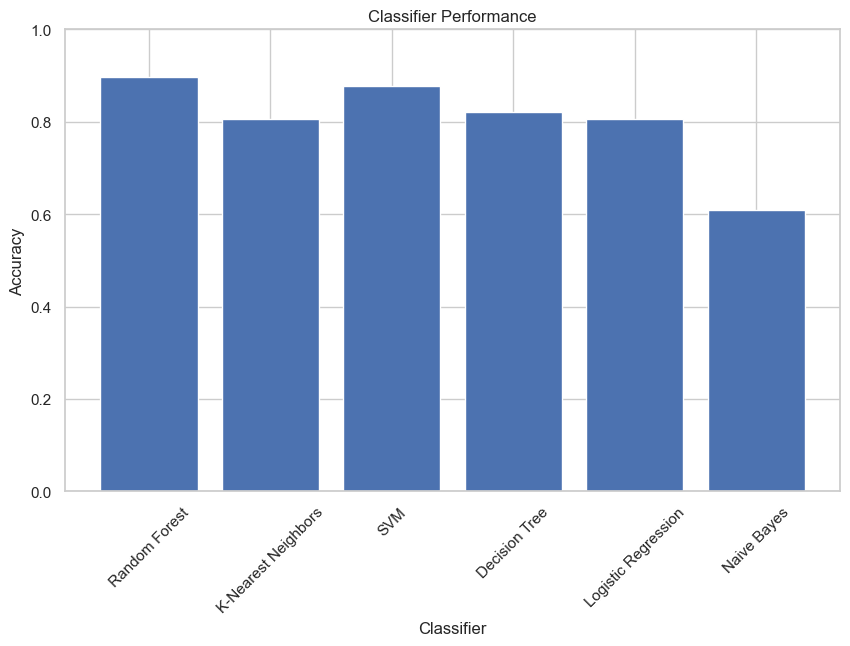

In [320]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

classifier_model = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB()
} 
classifier_names = []
accuracy_scores = []

for classifier in classifier_model:
    classifier_name=classifier
    model = classifier_model[classifier] 
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    classifier_names.append(classifier_name)
    accuracy_scores.append(accuracy)
    print(f"{classifier_name} Accuracy: {accuracy}")
    

# Plot classifier performance
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Performance')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()    


In [321]:

from sklearn.model_selection import cross_val_score
for i in range(5):
    cv = cross_val_score(classifier_model['Random Forest'], x, y, cv=5)
    print(f"Cross Validation Score  : {cv.mean()}")


Cross Validation Score  : 0.6584419008282619
Cross Validation Score  : 0.6460035121046008
Cross Validation Score  : 0.6468139938515177
Cross Validation Score  : 0.6534865838523914
Cross Validation Score  : 0.6482295651356431



## Hyper Parameter Tunning RandomForest Classifier


In [322]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Getting the best parameter
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Training with best parameter
best_classifier = RandomForestClassifier(random_state=42, **best_params)
best_classifier.fit(x_train, y_train)

# Predicition
y_pred = best_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)



Best Parameters: {'max_depth': None, 'n_estimators': 300}
Best Score: 0.8877788097780381
Test Accuracy: 0.8989388580090955


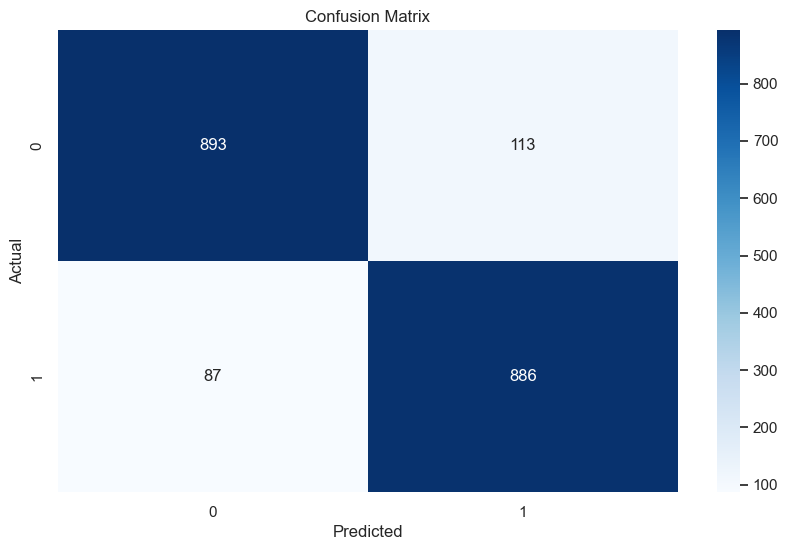

              precision    recall  f1-score   support

          No       0.91      0.89      0.90      1006
         Yes       0.89      0.91      0.90       973

    accuracy                           0.90      1979
   macro avg       0.90      0.90      0.90      1979
weighted avg       0.90      0.90      0.90      1979



In [323]:

from sklearn.metrics import confusion_matrix,classification_report

# plot confusion matrix 
fig = plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Classification Report
report = classification_report(y_test, y_pred)
print(report)


In [324]:

# Saving the model
import joblib
joblib.dump(best_classifier,'rain_predictor_next_day.pkl')

['rain_predictor_next_day.pkl']

## Model building and evaluation
- Predict Rainfall amount

In [305]:

# Selecting revelant columns
x = df.drop('Rainfall', axis=1)
y = df['Rainfall']



In [307]:
x = pd.get_dummies(df, columns=['RainTomorrow'],drop_first=True)

In [308]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)
print("Train data shape: ", x_train.shape)
print("Test data shape: ", x_test.shape)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


Train data shape:  (5091, 77)
Test data shape:  (1273, 77)


In [309]:


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


regressor_models={    
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'ElasticNet':ElasticNet(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'SVR':SVR(),
    'KNeighborsRegressor':KNeighborsRegressor()    
}

mse_scores = []

r2_scores = []


for regressor in regressor_models:
    regressor_name = regressor
    model = regressor_models[regressor]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    # Getting MSE and R2 scores
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)


    # Storing Average MSE and R2 scores for each model
    mse_scores.append(mse)
    r2_scores.append(r2)


Report = {"Regressors":regressor_models.keys(),"MSE": mse_scores,"R2":r2_scores} 
pd.DataFrame(Report)


,Regressors,MSE,R2
0,LinearRegression,1.150232e-28,1.000000
1,Ridge,1.477656e-06,1.000000
2,Lasso,8.073855e-01,0.957461
3,ElasticNet,2.707451e+00,0.857350
4,DecisionTreeRegressor,1.846033e-03,0.999903
5,RandomForestRegressor,1.979505e-04,0.999990
6,AdaBoostRegressor,9.919929e-02,0.994773
7,GradientBoostingRegressor,9.056557e-04,0.999952
8,SVR,1.914825e+00,0.899112
9,KNeighborsRegressor,8.311347e+00,0.562093


In [310]:

from sklearn.model_selection import cross_val_score
for i in range(5):
    cv = cross_val_score(regressor_models['RandomForestRegressor'], x, y, cv=5)
    print(f"Cross Validation Score  : {cv.mean()}")


Cross Validation Score  : 0.9999525959191852
Cross Validation Score  : 0.9999506441260844
Cross Validation Score  : 0.9999542659813733
Cross Validation Score  : 0.9999575293891567
Cross Validation Score  : 0.9999558175650414


## HyperParameter Tuning


In [311]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5, 10]

}


rf_model= RandomForestRegressor()

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(x_test)

# Calculate evaluation metrics using the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print('Best Hyperparameters:', best_model)
print('Mean Squared Error (MSE):', mse)
print('R-squared Score (R2 Score):', r2)


Best Hyperparameters: RandomForestRegressor(max_depth=10, n_estimators=300)
Mean Squared Error (MSE): 0.00013665247765129283
R-squared Score (R2 Score): 0.9999928000755838


In [312]:

# Saving the model
import joblib
joblib.dump(best_model,'rain_amount_predictor.pkl')

['rain_amount_predictor.pkl']